In [1]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
# Loading your IBM Q account(s)
provider = IBMQ.load_account()

### Zadanie 1

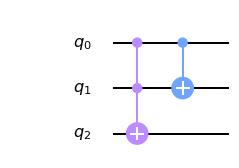

In [2]:
inc = QuantumCircuit(3)
inc.ccx(0,1,2)
inc.cx(0,1)
inc.draw()

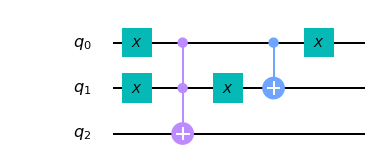

In [3]:
dec = QuantumCircuit(3)
dec.x(0)
dec.x(1)
dec.ccx(0,1,2)
dec.x(1)
dec.cx(0,1)
dec.x(0)
dec.draw()

In [10]:
random_walk_step = QuantumCircuit(3)
random_walk_step.h(0)
random_walk_step = random_walk_step + inc + dec 
random_walk_step.draw()

def random_walk(step):
    random_walk = random_walk_step.copy()
    for s in range(step-1):
        random_walk += random_walk_step
    return random_walk
    

In [11]:
def simulate_statevector(circuit):
    backend = Aer.get_backend('statevector_simulator')
    job = execute(circuit, backend)
    result = job.result()
    outputstate = result.get_statevector(circuit, decimals=3)
    print(outputstate)

In [12]:
simulate_statevector(random_walk(1))

[0.   +0.j 0.   +0.j 0.   +0.j 0.707+0.j 0.   +0.j 0.   +0.j 0.707+0.j
 0.   +0.j]


Dla 1 kroku błądzenia otrzymałam licząc ręcznie 1/sqrt(2) * (|110> + |011>) czyli zapisując tensorowo 1/sqrt(2) pod indeksem 4+2 i 2+1 (licząc indeksy od 0) czyli dokładnie tak jak wskazała symulacja statevector. Oznacza to prawdopodobieństwo po 1/2 dla |11> i |01> na qubitach |q2q1>

In [15]:
simulate_statevector(random_walk(2))

[ 0.5-0.j  0.5+0.j  0. +0.j  0. +0.j  0.5+0.j -0.5+0.j  0. +0.j  0. +0.j]


Dla 2 kroku błądzenia otrzymałam licząc ręcznie 1/2 * (|100> + |001> + |000> - |101>) czyli zapisując tensorowo 1/2 pod indeksem 4, 1, 0 i 4+1 czyli dokładnie tak jak wskazała symulacja statevector. Oznacza to prawdopodobieństwa 1/4+1/4 dla stanu |10> i 1/4+1/4 dla stanu |00> na qubitach |q2q1>

In [16]:
simulate_statevector(random_walk(3))

[ 0.   +0.j  0.   +0.j  0.   +0.j -0.   +0.j  0.   +0.j  0.   +0.j
  0.707-0.j  0.707-0.j]


Dla 3 kroku błądzenia otrzymałam licząc ręcznie 1/sqrt(2) * (|111> + |110>) czyli zapisując tensorowo 1/sqrt(2) pod indeksem 7 i 6 czyli dokładnie tak jak wskazała symulacja statevector. Oznacza to prawdopodobieństwo 1 dla stanu |11> na qubitach |q2q1>

### Zadanie 2

In [43]:
def simulate_quasm(qc):
    backend = Aer.get_backend('qasm_simulator')
    job = execute(qc, backend, shots=1024)
    result = job.result()
    return result.get_counts(qc)

def simulate_melbourne(qc):
    backend = provider.get_backend('ibmq_16_melbourne')
    job = execute(qc, backend=backend)
    result = job.result()
    return result.get_counts(qc)

measured = QuantumCircuit(3, 2)
measured.barrier([1,2])
measured.measure([1,2],[0,1])


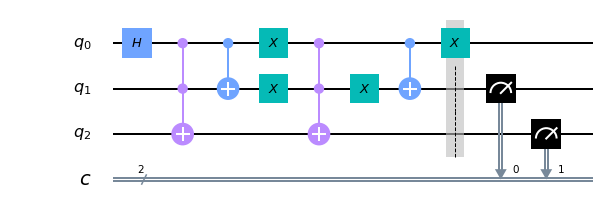

In [44]:
rw1 = random_walk(1) + measured
rw1.draw()

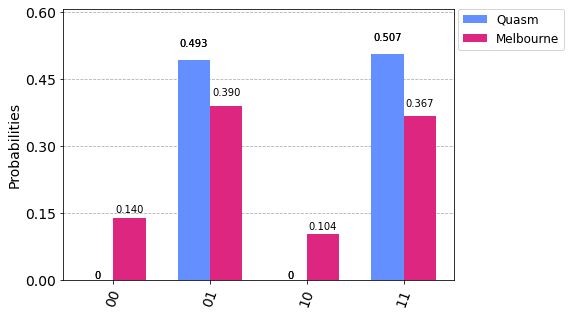

In [45]:
plot_histogram([simulate_quasm(rw1), simulate_melbourne(rw1)], legend=['Quasm', 'Melbourne'])

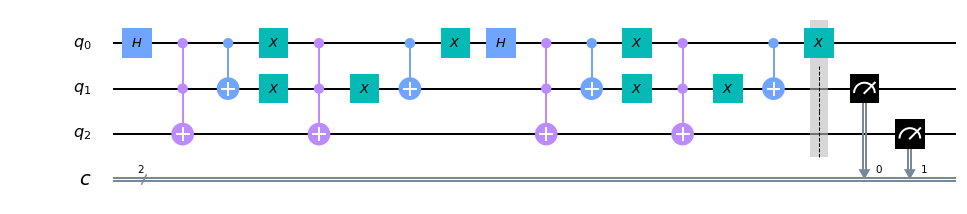

In [46]:
rw2 = random_walk(2) + measured
rw2.draw()

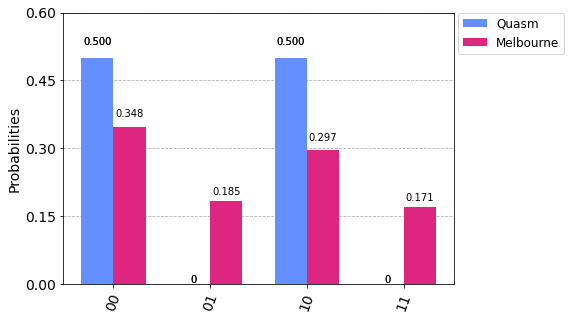

In [47]:
plot_histogram([simulate_quasm(rw2),simulate_melbourne(rw2)], legend=['Quasm', 'Melbourne'])

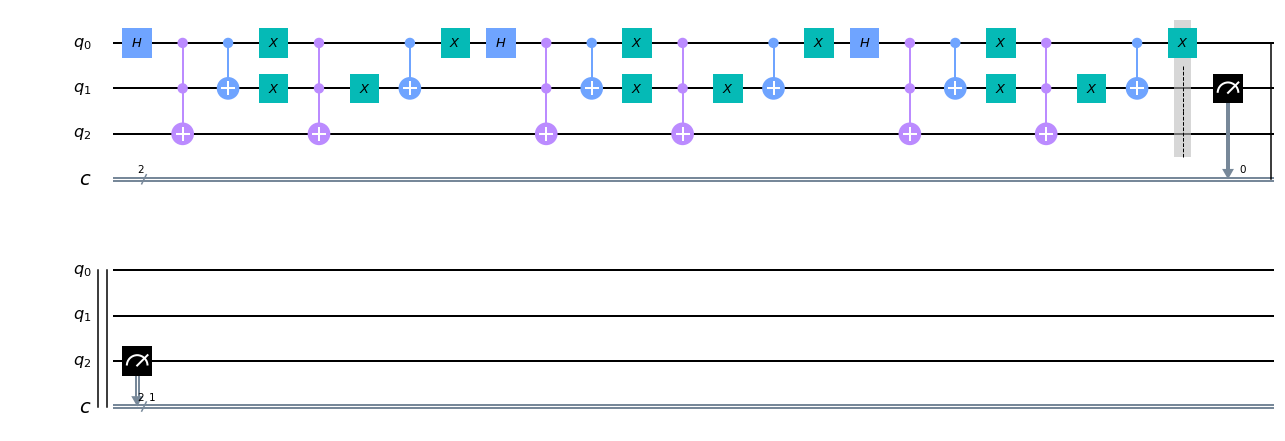

In [48]:
rw3 = random_walk(3) + measured
rw3.draw()

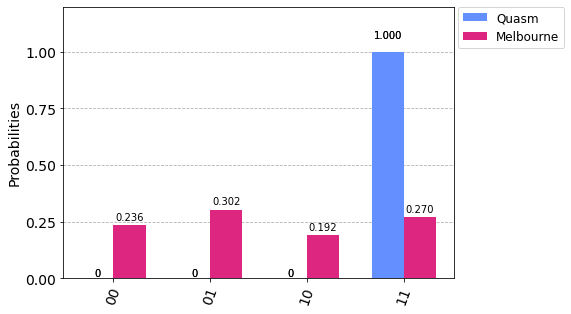

In [49]:
plot_histogram([simulate_quasm(rw3),simulate_melbourne(rw3)], legend=['Quasm', 'Melbourne'])

Błędy zwiększają się bardzo wraz z kolejnym krokiem. Dla jednego kroku prawdopodobieństwo wystąpienia stanu, który toretycznie nie powinien wystąpić to około 12%. Dla drugiego kroku około 17%. Dla trzeciego kroku choć teoretycznie P(|11>) = 1 to rzeczywisty komputer zwrócił 27% i nie był to najczęstszy wynik - |01> pojawiło się w ponad 30% prób.